
========================================================<br>
<br>
   File name   : YOLOv3_colab_training.ipynb<br>
   Author      : PyLessons<br>
   Created date: 2020-09-30<br>
   Website     : https://pylessons.com/YOLOv3-TF2-GoogleColab<br>
   GitHub      : https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3<br>
   Description : Train custom model on Google colab tutorial<br>
<br>
================================================================


**Open this notebook from google drive**<br>
**Go to "Edit" -> "Notebook settings" and enable GPU.**


In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Fri Oct 30 19:52:37 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Connect and authorize google drive with google colab:**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
gdrive	sample_data


**Open our project "TensorFlow-2.x-YOLOv3" direcotry in google drive:**

In [3]:
%cd gdrive/My\ Drive/TensorFlow-2.x-YOLOvx/
!ls

/content/gdrive/My Drive/TensorFlow-2.x-YOLOvx
checkpoints		  IMAGES	     README.md
Collect_training_data.py  LICENSE	     requirements.txt
custom_dataset		  log		     tools
deep_sort		  mAP		     train.py
detection_custom.py	  mnist		     yolov3
detection_demo.py	  model_data	     YOLOv3_colab_training.ipynb
detect_mnist.py		  object_tracker.py
evaluate_mAP.py		  __pycache__


**Install all required libraries for our project:**

In [4]:
!pip install -r ./requirements.txt

     |████████████████████████████████| 320.4MB 47kB/s 
     |████████████████████████████████| 320.4MB 52kB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
     |████████████████████████████████| 1.3MB 51.0MB/s 
     |████████████████████████████████| 81kB 13.0MB/s 
     |████████████████████████████████| 6.7MB 17.7MB/s 
     |████████████████████████████████| 552kB 55.4MB/s 
     |████████████████████████████████| 71kB 12.3MB/s 
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=96af1ea102f1a6155e375763bfdf93e0ca9a80e46f43e972ebf8902ec410a4c8
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
  Created wheel for awscli: filename=awscli-1.18.169-py2.py3-none-any.whl size=3400260 sha256=a2cd0b5a323150f1efb16f44ab0e7dd80c0a4d1eac20b62f46e938e19af351ea
  Stored in directory: /root/.cache/pip/wheels/82/a6/0d/ce699121b5aa27182cf927148a58c09a2e5fad15e386270d1f
Successfully built wget awscli
ERROR: 

**Download yolov3.weights if you don't have it:**

**Test if TensorFlow works with gpu for you, in output should see similar results:**
```
2.3.0
'/device:GPU:0'
```

In [5]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.3.1


'/device:GPU:0'

**Test by loading trained model:**

In [6]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov4 import Create_Yolo
from yolov3.utils import load_yolo_weights, detect_image
from yolov3.configs import *

if YOLO_TYPE == "yolov4":
    Darknet_weights = YOLO_V4_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V4_WEIGHTS
if YOLO_TYPE == "yolov3":
    Darknet_weights = YOLO_V3_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V3_WEIGHTS

yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE)
load_yolo_weights(yolo, Darknet_weights) # use Darknet weights

**Test by testing detection on original model:**

In [14]:
#@title Default title text
image_path   = "./IMAGES/street.jpg"

image = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)
print(pred_bbox)

Output hidden; open in https://colab.research.google.com to view.

**Run `XML_to_YOLOv3.py` script to convert XML files to YOLOv3 annotations files:**

In [ ]:
!python tools/XML_to_YOLOv3.py

/content/gdrive/My Drive/TensorFlow-2.x-YOLOvx/custom_dataset/train
/content/gdrive/My Drive/TensorFlow-2.x-YOLOvx/custom_dataset/train/bryan-input.jpg 16,26,179,83,0 21,144,176,212,0 21,270,180,332,0 26,392,176,454,0 25,495,182,561,0 27,637,171,701,0 31,750,216,813,0 24,862,209,927,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOvx/custom_dataset/train/bryan-radio-group.jpg 40,7,257,75,1 35,123,260,184,1 32,248,247,310,1 24,369,257,437,1
/content/gdrive/My Drive/TensorFlow-2.x-YOLOvx/custom_dataset/train/buttonz-bryan.jpg 332,350,826,568,2 2353,342,2800,563,2 2276,1984,2729,2179,2 3103,2005,3568,2171,2 1434,329,1987,552,2 3176,350,3734,516,2
/content/gdrive/My Drive/TensorFlow-2.x-YOLOvx/custom_dataset/train/input-julio.jpg 86,145,306,213,0 582,141,786,213,0 91,335,327,417,0 594,333,792,388,0 394,481,632,533,0 46,568,243,641,0 389,640,578,710,0 734,638,910,710,0 59,779,214,836,0 358,818,552,893,0 674,836,889,912,0 51,919,194,986,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOvx/custom_da

**Start training custom model:**

In [ ]:
from train import *
tf.keras.backend.clear_session()
main()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9212206175960603819
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4451047536933622480
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7904096043525143300
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14613293312
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1935950463943441664
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]
RuntimeError in tf.config.experimental.list_physical_devices('GPU')
GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
skipping conv2d_74
skipping conv2d_66
skipping conv2d_58
epoch: 0 step:    2/15, lr:0.000007, giou_loss:  15.11, conf_loss:1772.35, prob_loss: 100.98, total_loss:18

**Create Yolo v3 custom model and load custom trained weights**

In [7]:
yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov3_custom") # use keras weights
#yolo.load_weights("./checkpoints/yolov4_custom") # use keras weights

**Test the detection with `IMAGES/plate_2.jpg` image**

results.json file saveda


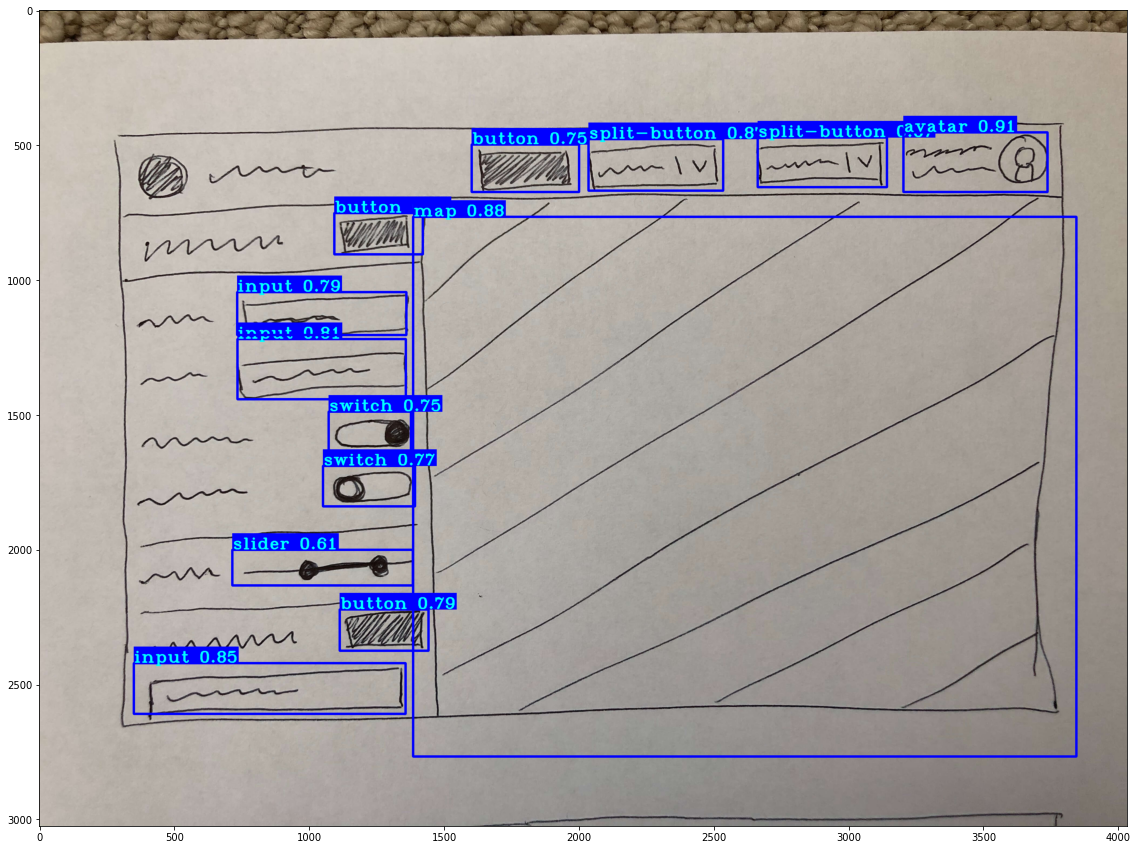

In [8]:
image_path   = "./IMAGES/3076.jpg"
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

# **You just trained your first Yolo v3 custom object detector on google colab, GOOD JOB!!**